## Import Libraries 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load the MNIST dataset

In [163]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Check the shape

In [165]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


## Preprocess the data

#### Normalize pixel values between 0 and 1

In [167]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### Reshape for CNN input (samples, height, width, channels)

In [169]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [171]:
y_test_labels = y_test.copy()

#### One-hot encode labels

In [173]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Build the CNN model

In [175]:
model = models.Sequential()

#### First Conv-Pool block

In [177]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

#### Second Conv-Pool block

In [179]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

#### Flatten and Dense layers

In [181]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## Compile the model

In [183]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Model Summary

In [185]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [187]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.8613 - loss: 0.5047 - val_accuracy: 0.9808 - val_loss: 0.0690
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9806 - loss: 0.0646 - val_accuracy: 0.9838 - val_loss: 0.0507
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9882 - loss: 0.0402 - val_accuracy: 0.9878 - val_loss: 0.0442
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9913 - loss: 0.0290 - val_accuracy: 0.9905 - val_loss: 0.0339
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9902 - val_loss: 0.0373
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9902 - val_loss: 0.0406
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9956 - loss: 0.0146 - val_accuracy: 0.9882 - val_loss: 0.0465
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9958 - loss: 0.0133 - 

## Evaluate the model

In [188]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9864 - loss: 0.0454

Test Accuracy: 0.9896


## Visualize training history

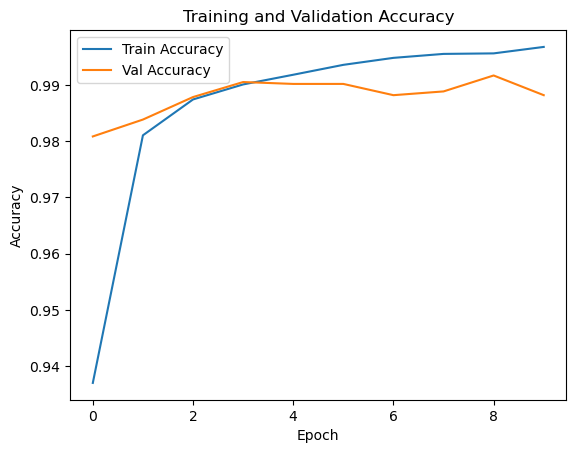

In [189]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Confusion Matrix

#### Predict the classes

In [190]:
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#### Create confusion matrix

In [191]:
cm = confusion_matrix(y_test_labels, y_pred_classes)

#### Display Confusion Matrix (Raw counts)

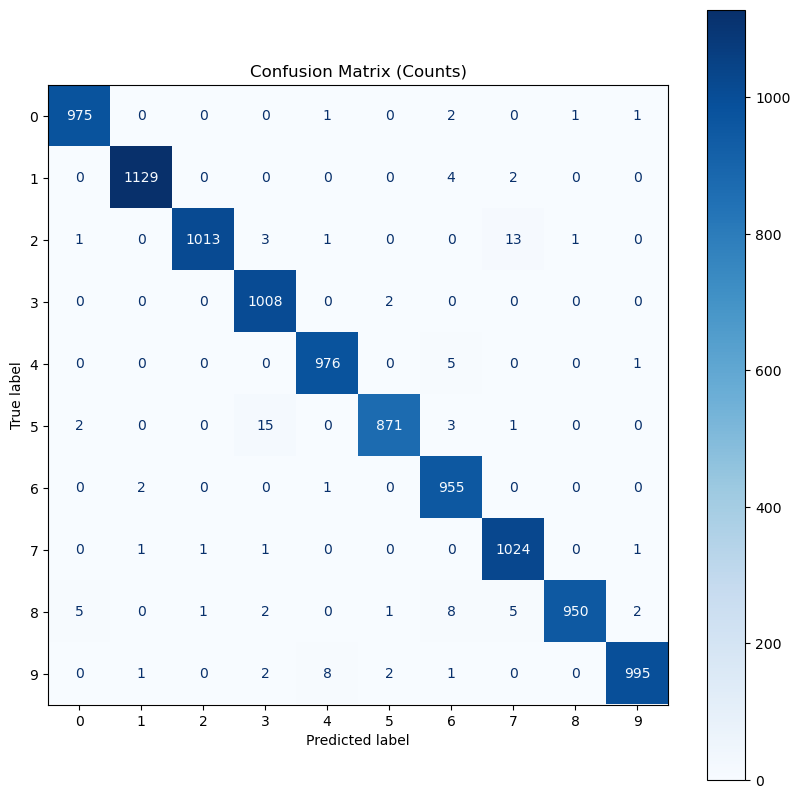

In [198]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Counts)')
plt.show()

#### Normalized Confusion Matrix (Percentages)

In [201]:
cm_normalized = confusion_matrix(y_test_labels, y_pred_classes, normalize='true')

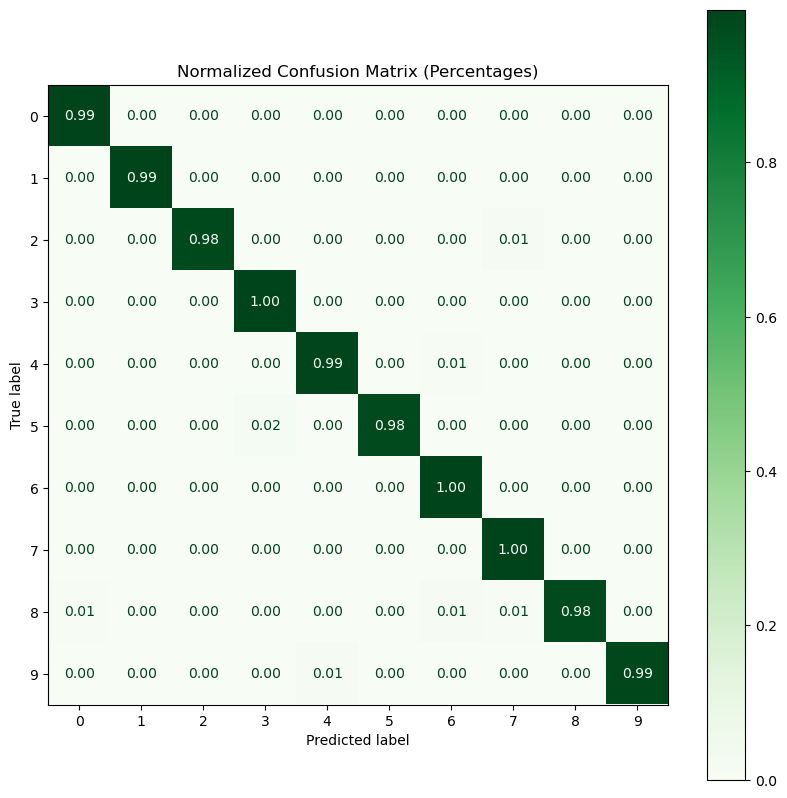

In [203]:
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(10,10))
disp_norm.plot(ax=ax, cmap='Greens', values_format='.2f')
plt.title('Normalized Confusion Matrix (Percentages)')
plt.show()

## Predicting on sample images

In [205]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#### Displaying some predictions

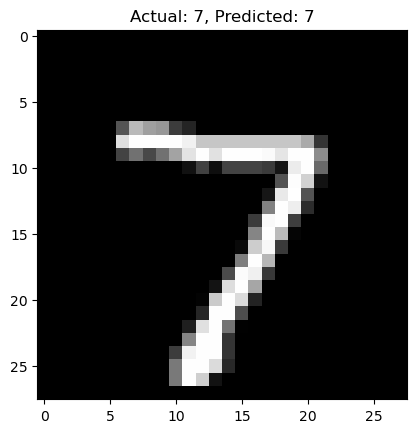

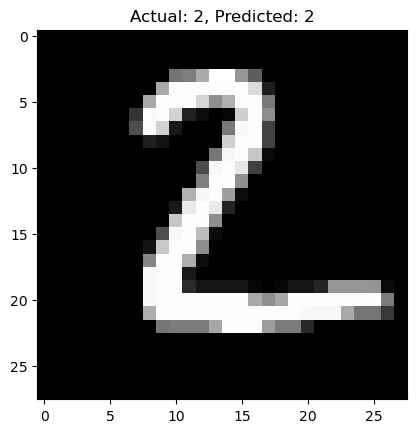

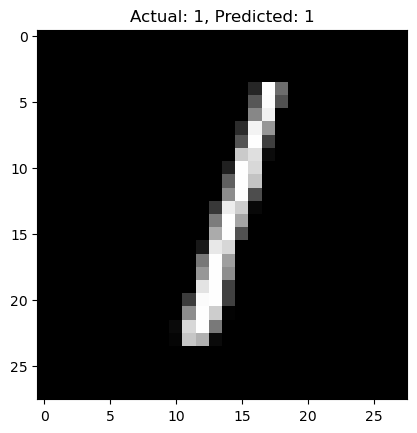

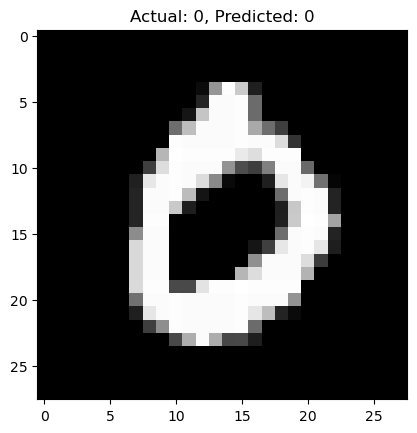

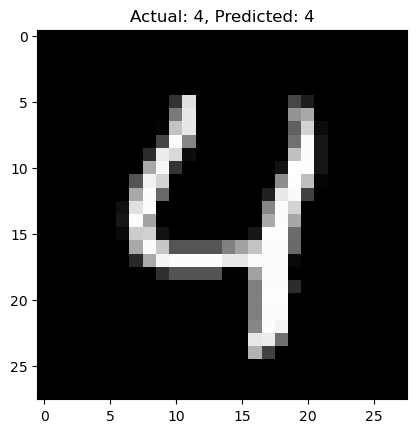

In [207]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Actual: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}")
    plt.show()